In [1]:
# 1.Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
# 2. Load data

In [4]:
data = pd.read_csv('/Users/eru/AI.2021/Countries-exercise.csv')

In [5]:
data.head(40)

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


In [89]:
data.shape

(241, 3)

In [90]:
data.head(10)

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


In [91]:
#3 Select the features

In [92]:
x = data.iloc[:, 1:3]

In [93]:
x.shape

(241, 2)

In [94]:
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [95]:
# 4 Plot the data

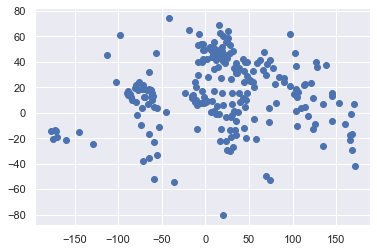

In [96]:
plt.scatter(x['Longitude'], x['Latitude'])

In [97]:
# 5. Clustering

In [98]:
kmeans = KMeans(3)

In [99]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [100]:
# 6. Clustering Resutls

In [101]:
clusters = kmeans.predict(x)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = clusters

In [102]:
data_with_clusters

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


In [103]:
# 4 Plot the Resutls

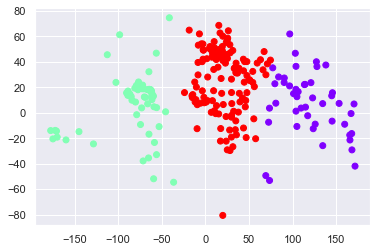

In [104]:
plt.scatter(data_with_clusters['Longitude'], 
            data_with_clusters['Latitude'], 
            c = data_with_clusters['Clusters'], 
            cmap ='rainbow')

In [105]:
#Selecting the number of clusters
#Use the ingerated sklearn method 'inertia_' .
# 'inertia_' -  tổng bình phương khoảng cách đến với mỗi tâm
# WCSS - phụ thuộc vào K, với K = 1, WCSS là lớn nhất

In [106]:
kmeans.inertia_

325235.522370559

In [107]:
wcss = []
for i in range(1,10):
    kmns = KMeans(i)
    kmns.fit(x)
    wcss_iter = kmns.inertia_
    wcss.append(wcss_iter)

In [108]:
wcss

[1413859.6798344275,
 657012.0797586325,
 325235.52237055905,
 256573.086759343,
 192212.4818949704,
 151536.30336760034,
 127465.62670990067,
 102913.61962302419,
 84927.05022223276]

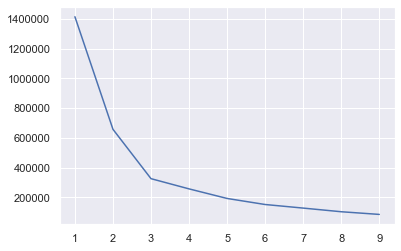

In [109]:
plt.plot(range(1,10), wcss)

In [110]:
kmeans = KMeans(5)

In [111]:
kmeans.fit(x)

KMeans(n_clusters=5)

In [112]:
clusters = kmeans.predict(x)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = clusters

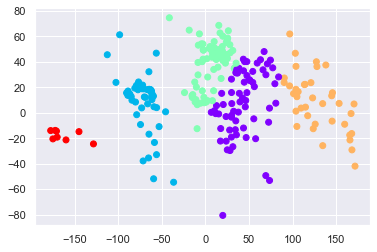

In [113]:
plt.scatter(data_with_clusters['Longitude'], 
            data_with_clusters['Latitude'], 
            c = data_with_clusters['Clusters'], 
            cmap ='rainbow')